# Transform
## Use this notebook to visualize an image-to-image translation model
This notebook will load a trained model and generate various images.

In [1]:
import tensorflow as tf
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt
import numpy as np
from trainer.config import config
from trainer.utils import dataset
from trainer.models import networks
from trainer import utils
from trainer import models
from trainer import callbacks

Unknown args: ['-f', '/home/jupyter/.local/share/jupyter/runtime/kernel-6dd59119-196d-4687-bbc1-1ce3b9e628cb.json']
Parsed args: {'job_dir': 'gs://duke-bme590-cz/ds-cyclegan/tmp/1575520492.3392465', 'epochs': 10, 'model_dir': './trained_models', 'cycle_consistency_loss': 10, 'is_test': False, 'in_h': 256, 'ds_loss': 10, 'generator_norm': 'instance', 'm': True, 'disc_loss': 1, 'ds_name': 'cycle_gan/horse2zebra', 'latent_z_dim': 8, 'buffer_size': 1000, 'startLRdecay': 100, 'id_loss': 5, 'ds_count': 1067, 'discriminator_norm': 'instance', 'bs': 1, 'in_w': 256}


In [4]:
g_AB = networks.bicycle_generator(img_shape=(256, 256, 3), z_shape=(config.latent_z_dim,), norm=config.generator_norm, skip=False, z_in='all')
g_BA = networks.bicycle_generator(img_shape=(256, 256, 3), z_shape=(config.latent_z_dim,), norm=config.generator_norm, skip=False, z_in='all')

In [ ]:
# Run the following code for loading classical cycleGAN
# g_AB = networks.create_generator(shape=(config.in_h, config.in_w, 3), norm=config.generator_norm, skip=False)
# g_BA = networks.create_generator(shape=(config.in_h, config.in_w, 3), norm=config.generator_norm, skip=False)
# g_AB.load_weights("./trainer/trained_models/horse2zebra/g_AB.weights.hdf5")
# g_BA.load_weights("./trainer/trained_models/horse2zebra/g_BA.weights.hdf5")

In [5]:
g_AB.load_weights("./trainer/trained_models/ds_facades/g_AB.weights.hdf5")
g_BA.load_weights("./trainer/trained_models/ds_facades/g_BA.weights.hdf5")

In [6]:
train_X, train_Y, test_X, test_Y = dataset.generate_dataset('cycle_gan/facades')

/usr/local/lib/python3.5/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


Instructions for updating:
Use eager execution and: 
`tf.data.TFRecordDataset(path)`


Instructions for updating:
Use eager execution and: 
`tf.data.TFRecordDataset(path)`


Dataset cycle_gan downloaded and prepared to /home/jupyter/tensorflow_datasets/cycle_gan/facades/0.1.0. Subsequent calls will reuse this data.


In [11]:
import matplotlib.pyplot as plt
import numpy as np
def generate_images(model, test_input):
  z1 = tf.random.normal((1, 8))
  prediction = model([test_input, z1])
    
  plt.figure(figsize=(12, 12))

  display_list = [test_input[0], prediction[0]]
  title = ['Input Image', 'Predicted Image']

  for i in range(2):
    plt.subplot(1, 2, i+1)
    plt.title(title[i])
    # getting the pixel values between [0, 1] to plot it.
    plt.imshow(display_list[i])
    plt.axis('off')
  plt.show()

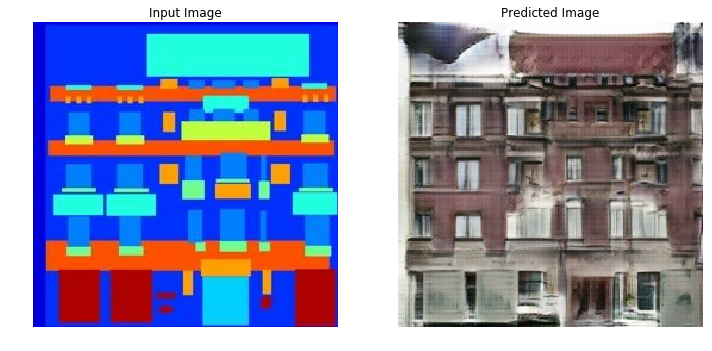

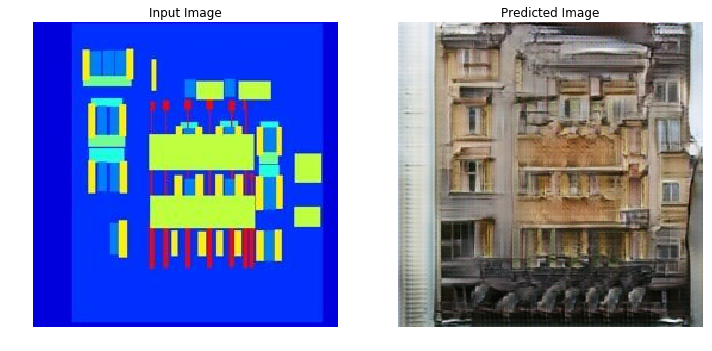

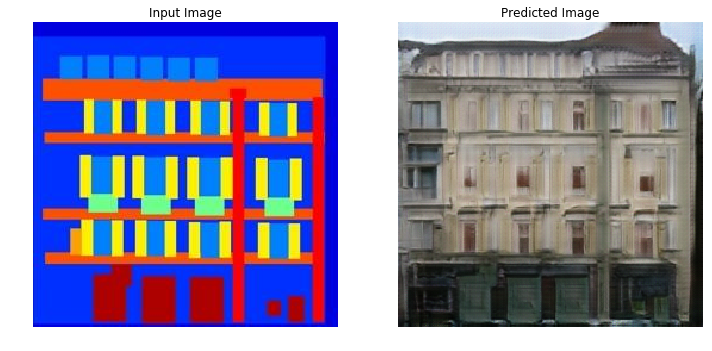

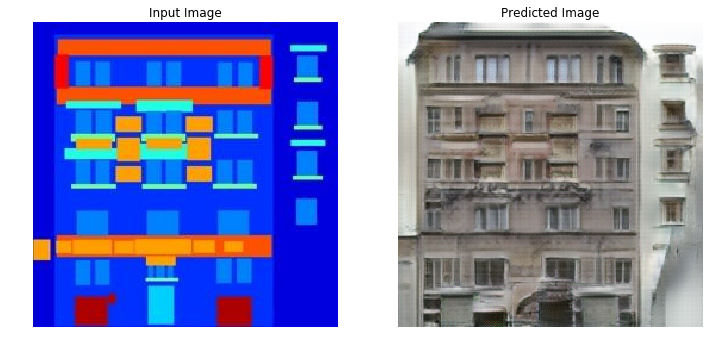

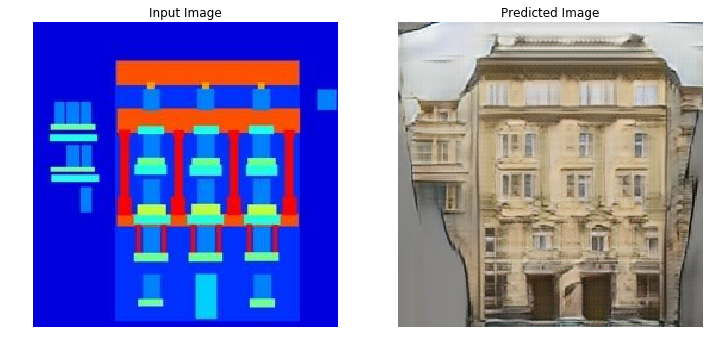

In [13]:
for inp in test_Y.take(5):
  generate_images(g_BA, inp)

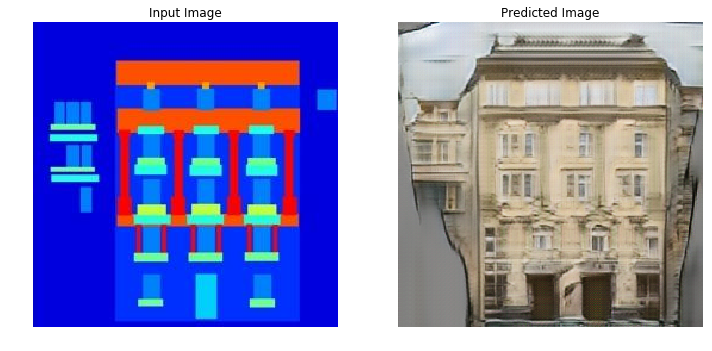

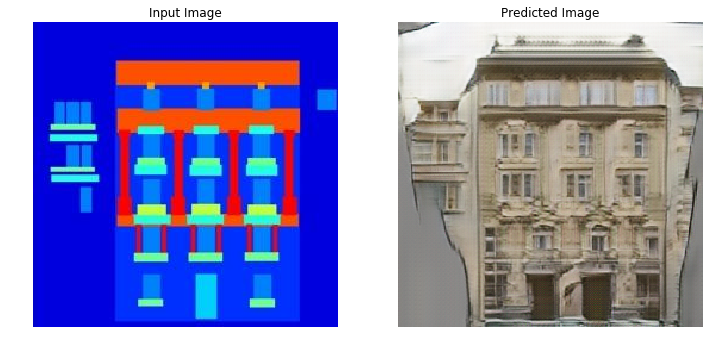

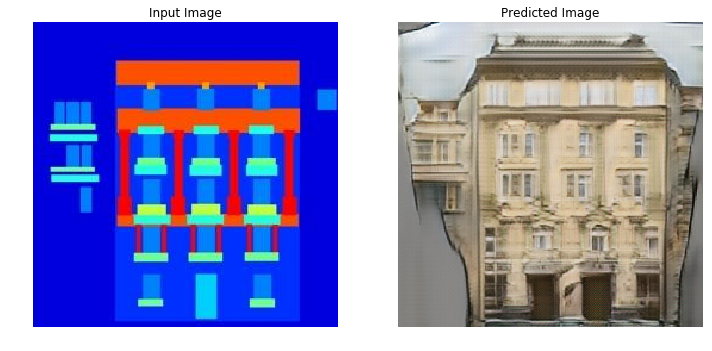

In [14]:
generate_images(g_BA, inp)
generate_images(g_BA, inp)
generate_images(g_BA, inp)